In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_March23.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from shapely.geometry import Point
import geopandas as gpd

In [3]:
df = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')

In [4]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [6]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [12]:
columns_to_drop = ['ID', 'Country', 'Source', 'End_Lat', 'End_Lng', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight','Street']
df = df.drop(columns=columns_to_drop, axis=1)

In [13]:
cities = df.groupby('State')['City'].transform(lambda x: x.mode()[0])

df['City'].fillna(cities, inplace=True)

In [14]:
columns_to_fill_means = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Wind_Speed(mph)', 'Precipitation(in)']

for column in columns_to_fill_means:
    df[column] = df[column].fillna(df.groupby('State')[column].transform('mean'))

In [15]:
df.duplicated().sum()

102358

In [16]:
df = df.drop_duplicates()

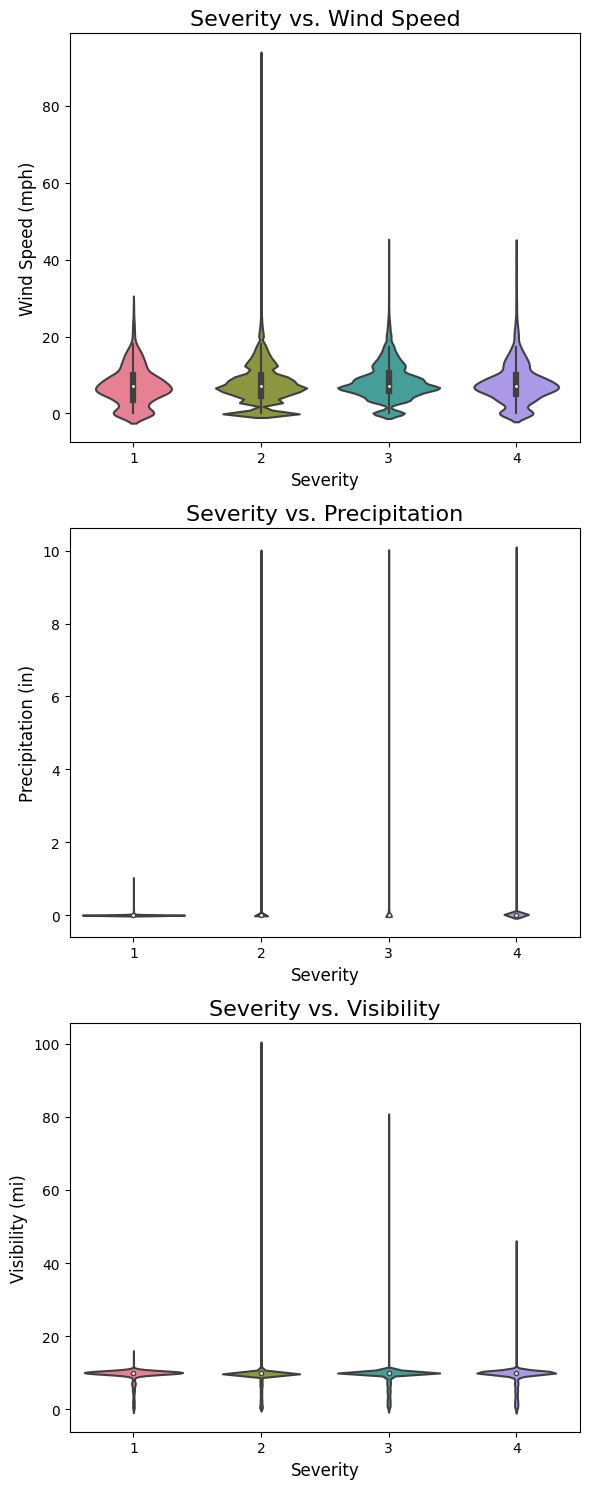

In [19]:
random_sample['Severity'] = random_sample['Severity'].astype('category')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))

sns.violinplot(data=random_sample, x='Severity', y='Wind_Speed(mph)', ax=axes[0], palette="husl")
axes[0].set_title('Severity vs. Wind Speed', fontsize=16)
axes[0].set_ylabel('Wind Speed (mph)', fontsize=12)
axes[0].set_xlabel('Severity', fontsize=12)

sns.violinplot(data=random_sample, x='Severity', y='Precipitation(in)', ax=axes[1], palette="husl")
axes[1].set_title('Severity vs. Precipitation', fontsize=16)
axes[1].set_ylabel('Precipitation (in)', fontsize=12)
axes[1].set_xlabel('Severity', fontsize=12)

sns.violinplot(data=random_sample, x='Severity', y='Visibility(mi)', ax=axes[2], palette="husl")
axes[2].set_title('Severity vs. Visibility', fontsize=16)
axes[2].set_ylabel('Visibility (mi)', fontsize=12)
axes[2].set_xlabel('Severity', fontsize=12)

plt.tight_layout()
plt.show()

random_sample['Severity'] = random_sample['Severity'].astype(int)

## Visualizing 

In [8]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

top_ten_streets_df = pd.DataFrame(street_df.head(10))

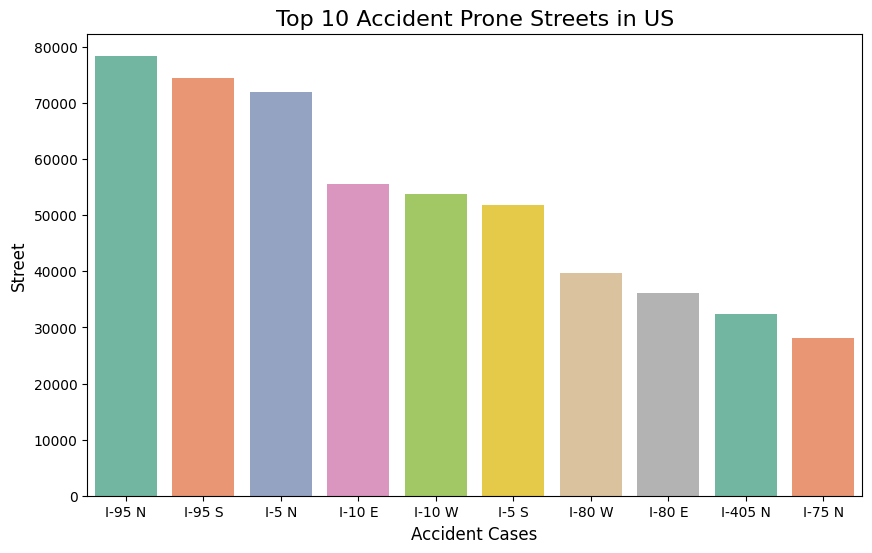

<Figure size 640x480 with 0 Axes>

In [11]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Cases', y='count', data=top_ten_streets_df, palette='Set2')

plt.title('Top 10 Accident Prone Streets in US', fontsize=16)
plt.xlabel('Accident Cases', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.show()
plt.savefig('top_10_streets.png')

In [20]:
random_sample = df.sample(n=100000)

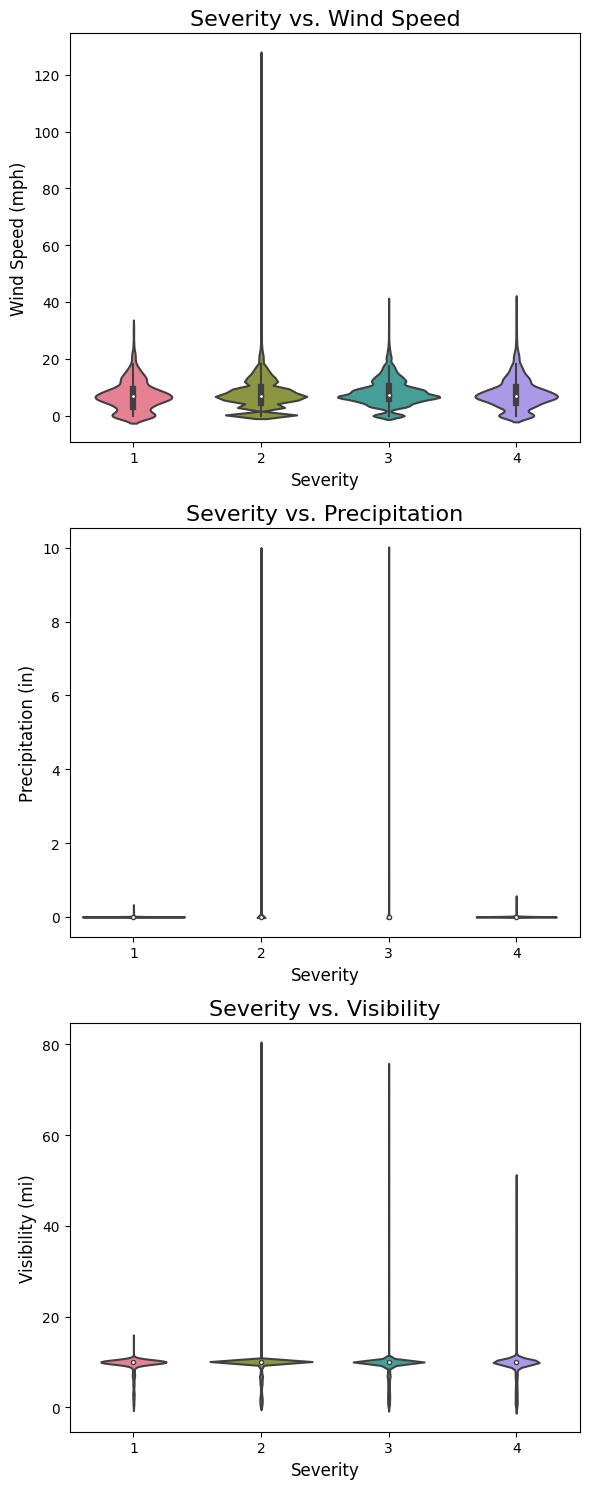

In [21]:
random_sample['Severity'] = random_sample['Severity'].astype('category')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 15))

sns.violinplot(data=random_sample, x='Severity', y='Wind_Speed(mph)', ax=axes[0], palette="husl")
axes[0].set_title('Severity vs. Wind Speed', fontsize=16)
axes[0].set_ylabel('Wind Speed (mph)', fontsize=12)
axes[0].set_xlabel('Severity', fontsize=12)

sns.violinplot(data=random_sample, x='Severity', y='Precipitation(in)', ax=axes[1], palette="husl")
axes[1].set_title('Severity vs. Precipitation', fontsize=16)
axes[1].set_ylabel('Precipitation (in)', fontsize=12)
axes[1].set_xlabel('Severity', fontsize=12)

sns.violinplot(data=random_sample, x='Severity', y='Visibility(mi)', ax=axes[2], palette="husl")
axes[2].set_title('Severity vs. Visibility', fontsize=16)
axes[2].set_ylabel('Visibility (mi)', fontsize=12)
axes[2].set_xlabel('Severity', fontsize=12)

plt.tight_layout()
plt.show()

random_sample['Severity'] = random_sample['Severity'].astype(int)

In [22]:
state_statistics = random_sample["State"].value_counts().reset_index()

state_statistics.rename(columns={'index': 'code', 'State': 'incidents'}, inplace=True)

state_statistics = state_statistics.sort_values('incidents', ascending=False)

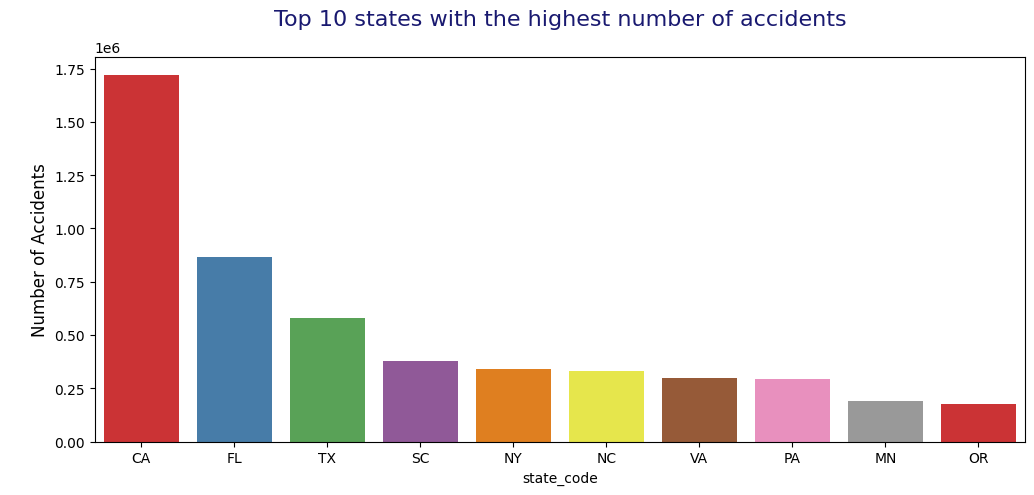

In [23]:
state_counts = df["State"].value_counts()
states = pd.DataFrame(state_counts).reset_index().sort_values('count', ascending=False)
states.rename(columns={'State':'state_code', 'count':'cases'}, inplace=True)
fig, ax = plt.subplots(figsize = (12,5))
top_10 = states[:10]
sns.barplot(x=top_10['state_code'], y=top_10['cases'], palette='Set1')
plt.title("Top 10 states with the highest number of accidents\n", fontdict = {'fontsize':16, 'color':'MidnightBlue'})
plt.ylabel("\nNumber of Accidents", fontdict = {'fontsize':12, 'color':'black'})
plt.savefig("Top 10 states with the highest number of accidents.png")
plt.show()

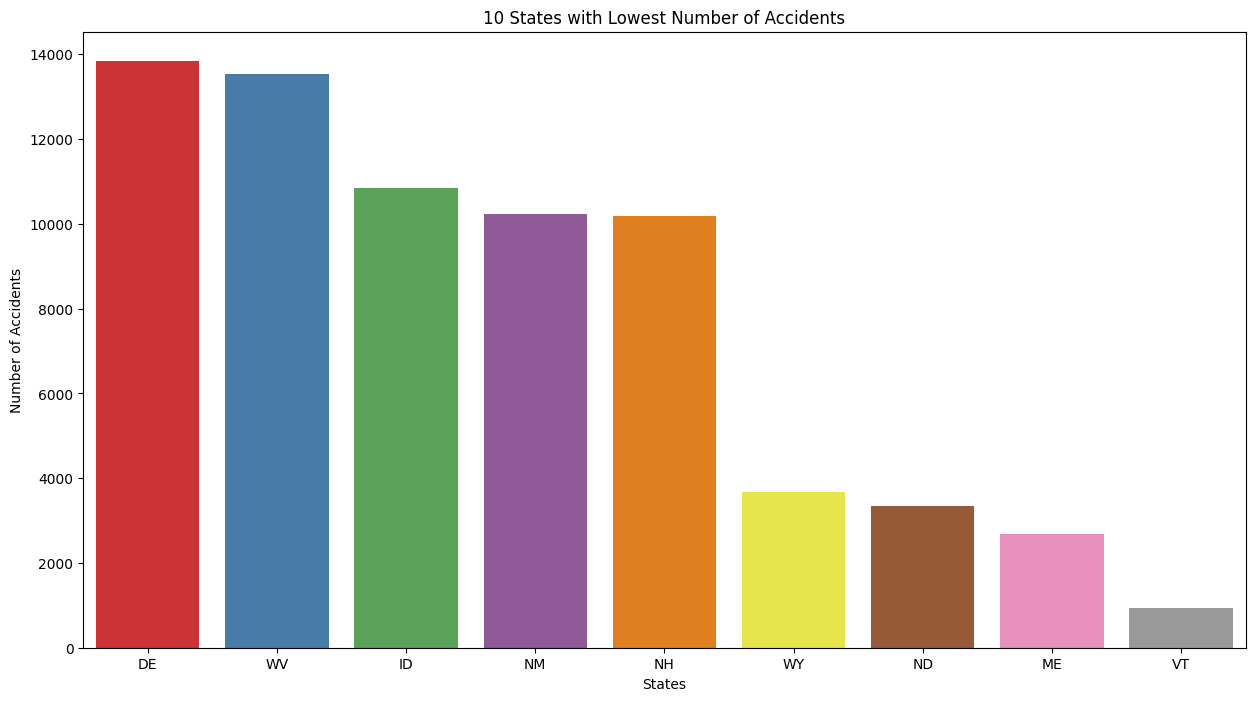

In [24]:
fig,axs = plt.subplots(figsize = (15,8))

x = state_counts[-10:-1].index.to_list()
y = state_counts[-10:-1].values.flatten()

sns.barplot(x=x, y = y, palette='Set1')
axs.tick_params(axis = 'x')
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("States")
plt.title("10 States with Lowest Number of Accidents")
plt.savefig("10 States with Lowest Number of Accidents.png")
plt.show()

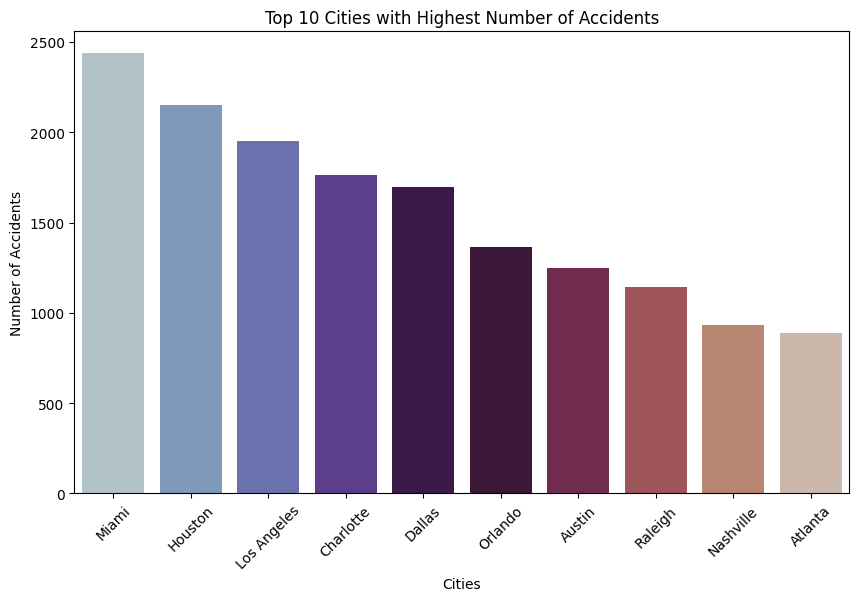

In [25]:
city_acc_counts = pd.DataFrame(random_sample['City'].value_counts()).reset_index()
city_acc_counts.columns = ['City', "Number of Accidents"]
city_acc_counts.sort_values(by='Number of Accidents', ascending=False, inplace=True)
x = city_acc_counts['City'][:10].to_list()
y = city_acc_counts["Number of Accidents"][:10]

fig, axs = plt.subplots(figsize=(10, 6))
sns.barplot(x=x, y=y, ax=axs, palette='twilight')
axs.tick_params(axis='x', rotation=45)
axs.set_ylabel("Number of Accidents")
axs.set_xlabel("Cities")
plt.title("Top 10 Cities with Highest Number of Accidents")
plt.savefig("Top 10 Cities with Highest Number of Accidents.png")
plt.show()

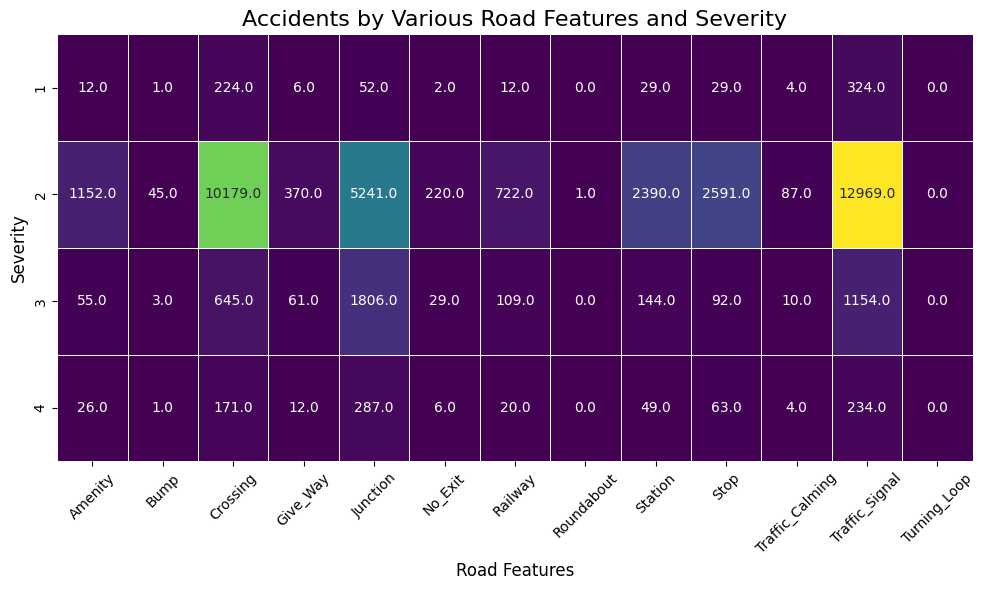

In [26]:
bool_severity_dataset = random_sample[['Severity', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction',
                                      'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
                                      'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']].copy()

accidents_by_bool_severity = bool_severity_dataset.groupby(['Severity']).sum()

plt.figure(figsize=(10, 6))
sns.heatmap(data=accidents_by_bool_severity, cmap='viridis', annot=True, fmt='.1f', linewidths=.5, cbar=False)
plt.title('Accidents by Various Road Features and Severity', fontsize=16)
plt.xlabel('Road Features', fontsize=12)
plt.ylabel('Severity', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Accidents by Various Road Features and Severity.png")
plt.show()

KeyError: 'SalePrice'

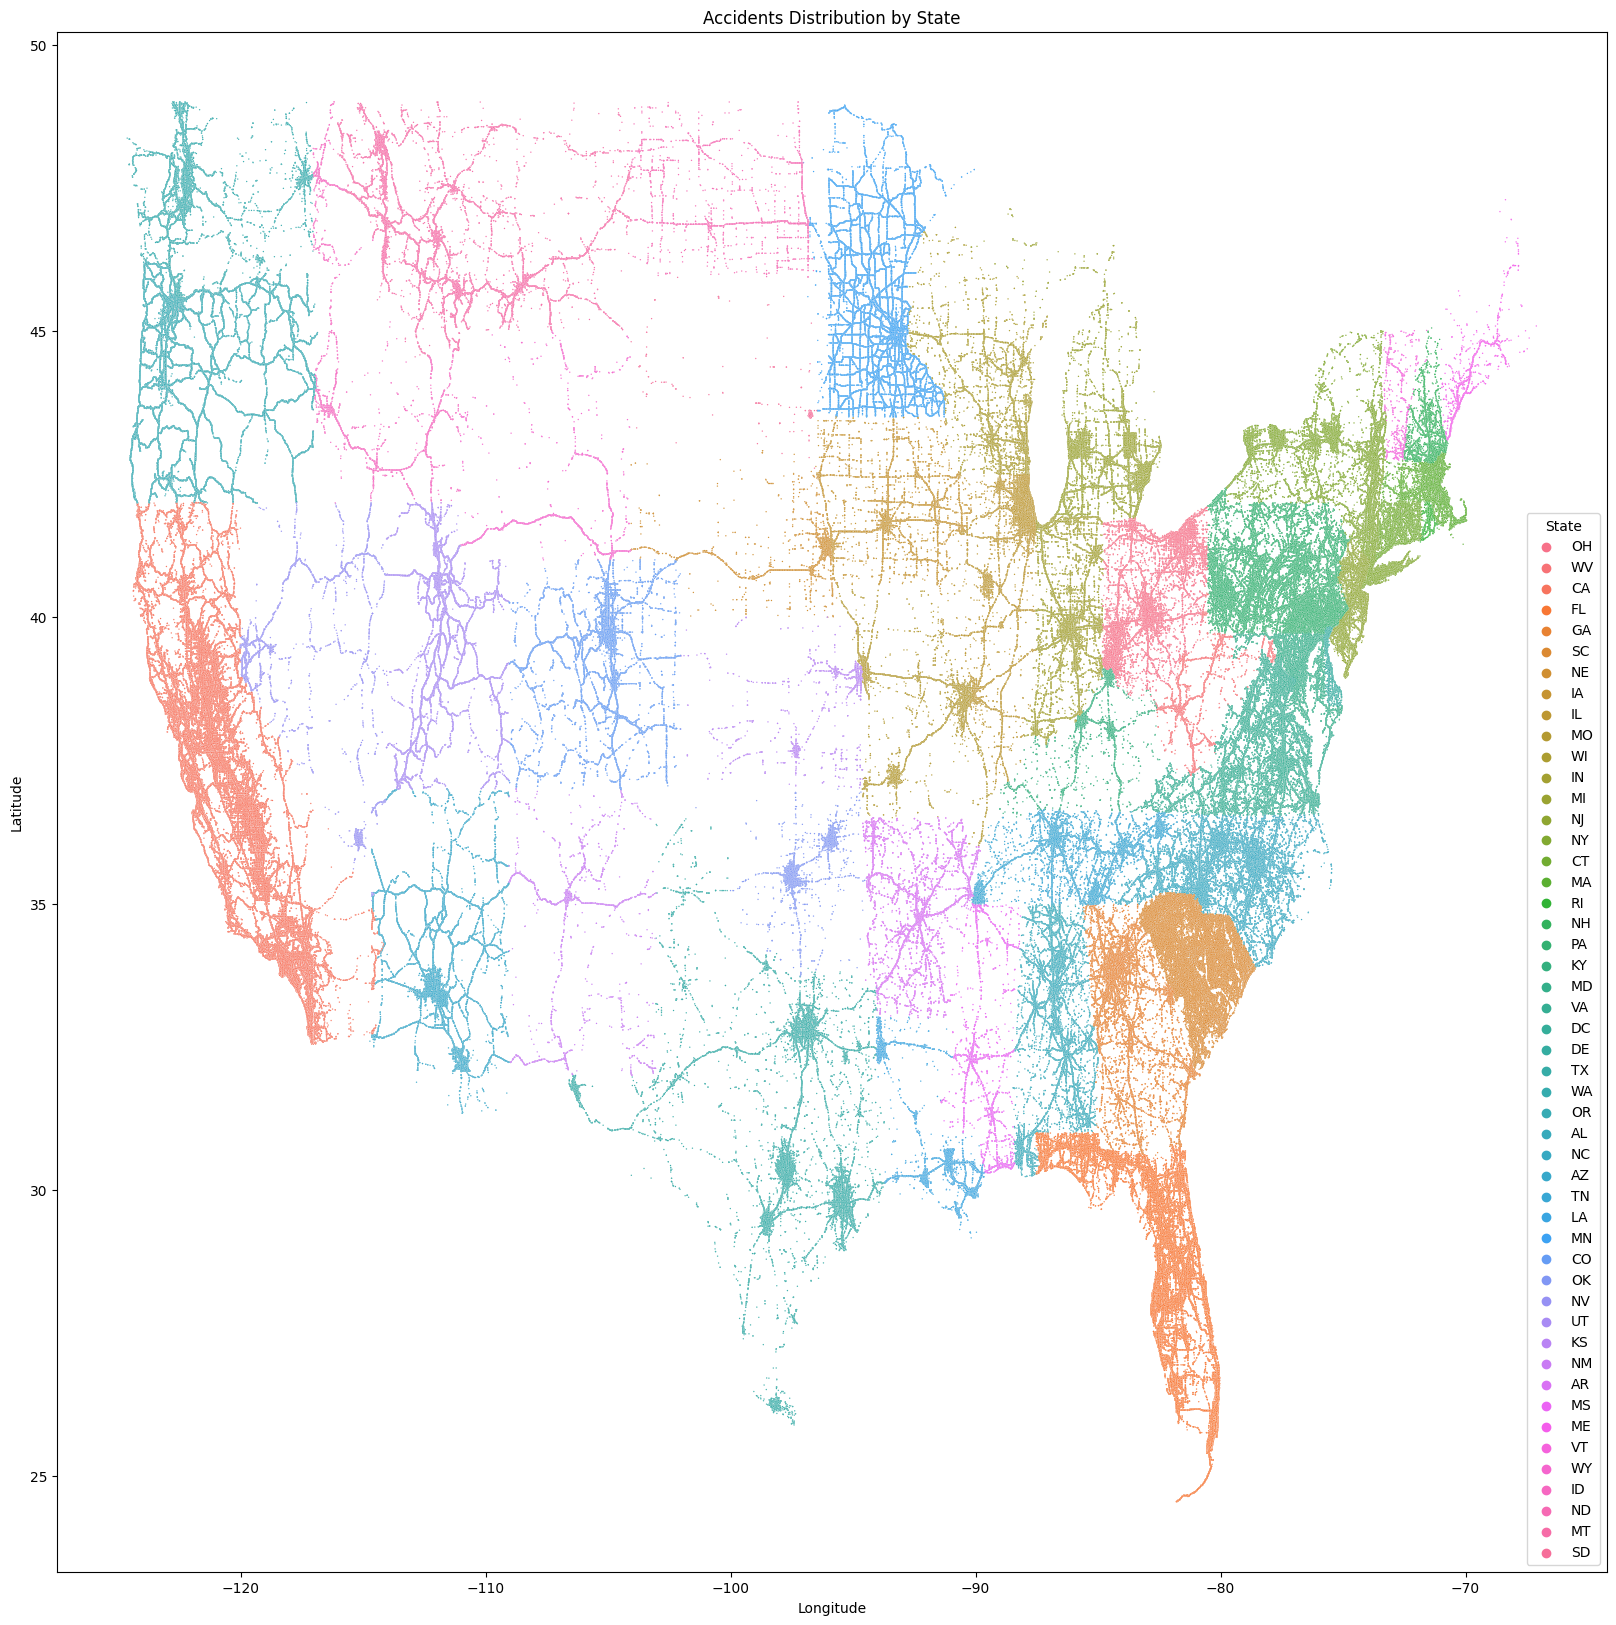

In [27]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=df.Start_Lng, y=df.Start_Lat, hue=df.State, s=1)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accidents Distribution by State')

plt.legend(title='State')
plt.show()

In [28]:
plt.savefig("Accidents Distribution by State.png")

<Figure size 640x480 with 0 Axes>

In [3]:
df = pd.read_csv("/kaggle/input/us-accidents/US_Accidents_March23.csv")

In [44]:
df['Start_Time'] = pd.to_datetime(df["Start_Time"], errors="coerce")
df['End_Time'] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df["Severity"]=df["Severity"].apply(lambda x : str(x))
df["Hour"]=df["Start_Time"].dt.hour
df["Month"]=df["Start_Time"].dt.month
df["Day"]=df["Start_Time"].dt.day_name()

In [46]:
copy_df = df.copy()

In [ ]:
import math
import random
i=0
result_dict = {}
for year in [2021,2022]:
    result_dict[year] = list([copy_df["Year"] == year].index)

for year in [2021,2022]:
    length_df=len(copy_df)
    i+=1
    for j in range(math.floor(length_df*0.02)):
        choice=random.choice(result_dict[year])
        copy_df.loc[choice, 'Sample']='Sample'+str(i)
        result_dict[year].remove(choice)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

contingency_table = pd.crosstab(df_copy["Sample"],df_copy["Severity"])

# Calculate the total sum of the contingency table
totalsum = contingency_table.sum().sum()

# Get row sums (Sum of Samples)
row_sums = contingency_table.sum(axis=1)

# Get column sums (Sum of Severities)
col_sums = contingency_table.sum(axis=0)

# Generate expected values matrix
expected_values = np.outer(row_sums, col_sums) / totalsum

# Get observed values directly from the contingency table
observed_values = contingency_table.values 

# Calculate the chi-square statistic
chi_squared_stat = ((observed_values-expected_values)**2/expected_values).sum().sum()

# Calculate the degrees of freedom
df_ = (len(row_sums)-1)*(len(col_sums)-1) 

# Get p-value from chi-square distribution
p_value = 1 - chi2.cdf(chi_squared_stat, df_)

print("Chi-squared Statistic :", chi_squared_stat)
print("Degrees of Freedom :", df_)
print("P-Value :", p_value)

In [ ]:
contingency_table = pd.crosstab(df_copy["Sample"],df_copy["Severity"])

# Calculate the total sum of the contingency table
totalsum = contingency_table.sum().sum()

# Get row sums (Sum of Samples)
row_sums = contingency_table.sum(axis=1)

# Get column sums (Sum of Severities)
col_sums = contingency_table.sum(axis=0)

# Generate expected values matrix
expected_values = np.outer(row_sums, col_sums) / totalsum

# Get observed values directly from the contingency table
observed_values = contingency_table.values 

# Calculate the chi-square statistic
chi_squared_stat = ((observed_values-expected_values)**2/expected_values).sum().sum()

# Calculate the degrees of freedom
df_ = (len(row_sums)-1)*(len(col_sums)-1) 

# Get p-value from chi-square distribution
p_value = 1 - chi2.cdf(chi_squared_stat, df_)

print("Chi-squared Statistic :", chi_squared_stat)
print("Degrees of Freedom :", df_)
print("P-Value :", p_value)

In [ ]:
df_copy=df_copy[(df["Temperature(C)"]<=42) & (df["Temperature(C)"]>=-10)]
temp_counts = df["Temperature(C)"].value_counts().reset_index()
temp_counts.columns = ["Temperature(C)", "Count"]
temp_counts

In [ ]:
df_copy=df_copy[(df_copy["Temperature(C)"]<=42) & (df_copy["Temperature(C)"]>=-10)]
temp_counts = df_copy["Temperature(C)"].value_counts().reset_index()
temp_counts.columns = ["Temperature(C)", "Count"]
temp_counts

In [ ]:
sns.scatterplot(temp_counts,x="Temperature(C)",y=temp_counts["Count"].apply(lambda x:math.log(x)))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = temp_counts['Temperature(C)'].values.reshape(-1, 1)
y = temp_counts['Count'].values


# Degree of the polynomial regression
degree = 3  # You can change this to the degree you want (e.g., 3 for cubic regression)

# Transforming the features to include polynomial terms
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fitting the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Getting the coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

In [ ]:
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_line_poly = poly.transform(X_line)
y_line = model.predict(X_line_poly)

# Plotting the data points and the line of regression
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data')
plt.plot(X_line, y_line, color='red', label='Regression Line')
plt.xlabel('Temperature(C)')
plt.ylabel('Count')
plt.title(f'Polynomial Regression (Degree {degree})')
plt.legend()
plt.grid(True)
plt.show()